## Load and Inspect the Dataset

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset from day.csv
data = pd.read_csv('day.csv')

# Getting a few rows of the dataset and getting data info to inspect the same
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


(   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  01-01-2018       1   0     1        0        6           0   
 1        2  02-01-2018       1   0     1        0        0           0   
 2        3  03-01-2018       1   0     1        0        1           1   
 3        4  04-01-2018       1   0     1        0        2           1   
 4        5  05-01-2018       1   0     1        0        3           1   
 
    weathersit       temp     atemp      hum  windspeed  casual  registered  \
 0           2  14.110847  18.18125  80.5833  10.749882     331         654   
 1           2  14.902598  17.68695  69.6087  16.652113     131         670   
 2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
 3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
 4           1   9.305237  11.46350  43.6957  12.522300      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
 None

In [90]:
# Ensuring integer conversion only on relevant numeric columns before mapping
data['yr'] = data['yr'].astype(int)
data['workingday'] = data['workingday'].astype(int)

# Converting 'season' and 'weathersit' to categorical variables with descriptive labels
data['season'] = data['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}).fillna('Unknown')
data['weathersit'] = data['weathersit'].map({
    1: 'Clear/Partly cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}).fillna('Unknown')

# Converting 'yr' to year format (2018 and 2019)
data['yr'] = data['yr'].map({0: 2018, 1: 2019}).fillna('Unknown')

# Converting 'dteday' to datetime format
data['dteday'] = pd.to_datetime(data['dteday'], dayfirst=True)

# Dropping the 'casual' and 'registered' columns since 'cnt' represents their sum
data_cleaned = data.drop(columns=['casual', 'registered'])

# Identifying the categorical columns where the number of unique values are more than 2
categorical_columns = ['season', 'mnth', 'weekday', 'weathersit']

# Creating dummy variables for those columns and drop the first category to avoid multicollinearity
data_with_dummies = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=True)

# Renaming columns
data_with_dummies.rename(columns={
    'dteday': 'Date',
    'yr': 'Year',
    'mnth': 'Month',
    'holiday':  'Holiday',
    'workingday': 'Working Day',
    'cnt': 'Total Rentals',
    'temp': 'Temperature',
    'atemp': 'Feeling temperature in Celsius',
    'hum': 'Humidity',
    'windspeed': 'Wind Speed'
}, inplace=True)



In [113]:
# Generating explanations based on the plot type
def explain_plot(plot_type, x=None, y=None, category=None):
    if plot_type == "histogram":
        print(f"This histogram shows the distribution of the '{x}' . \nIt helps to understand the spread and frequency of values, giving insights into the central tendency and dispersion.")

    elif plot_type == "countplot":
        print(f"This count plot shows the frequency of categories in the '{x}' . \nIt helps to understand how often each category appears in the dataset.")

    elif plot_type == "boxplot":
        print(f"This box plot displays the distribution of the '{y}' variable across the categories of the '{x}' . \nIt helps to identify the median, quartiles, and any outliers in the data.")

    elif plot_type == "scatterplot":
        print(f"This scatter plot shows the relationship between '{x}' and '{y}'. \nIt helps to observe any trends, correlations, or patterns between the two variables.")

    elif plot_type == "heatmap":
        print(f"This heatmap displays the correlation matrix of numerical . \nThe colors represent the strength and direction of the relationships, helping to identify highly correlated pairs.")

    else:
        print("Plot type not recognized. Please ensure to provide a valid plot type.")

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: Total Rentals, dtype: float64


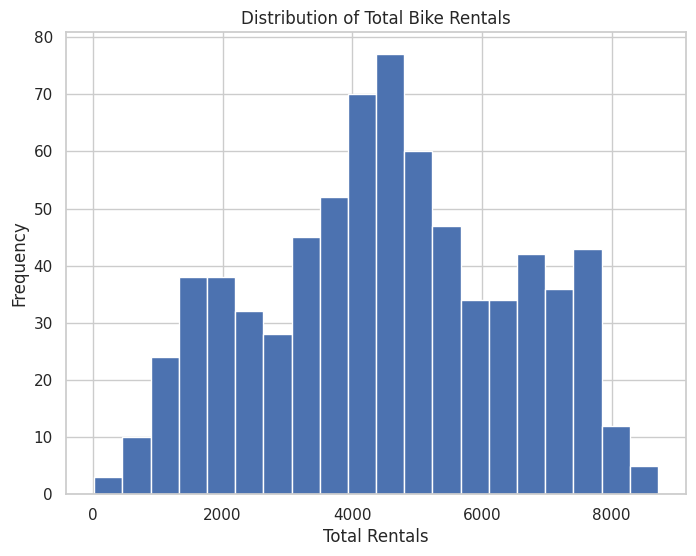

This histogram shows the distribution of the 'Distribution of Total Bike Rentals' . 
It helps to understand the spread and frequency of values, giving insights into the central tendency and dispersion.


In [114]:


# Setting style for plots
sns.set(style="whitegrid")

# Descriptive statistics for numerical variables
print(data_with_dummies['Total Rentals'].describe())

# Histogram for 'cnt' (Total bike rentals)
data_with_dummies['Total Rentals'].hist(bins=20, figsize=(8, 6))
plt.title('Distribution of Total Bike Rentals')
plt.xlabel('Total Rentals')
plt.ylabel('Frequency')
plt.show()


# Explanation for 'cnt' histogram
explain_plot('histogram', x='Distribution of Total Bike Rentals')






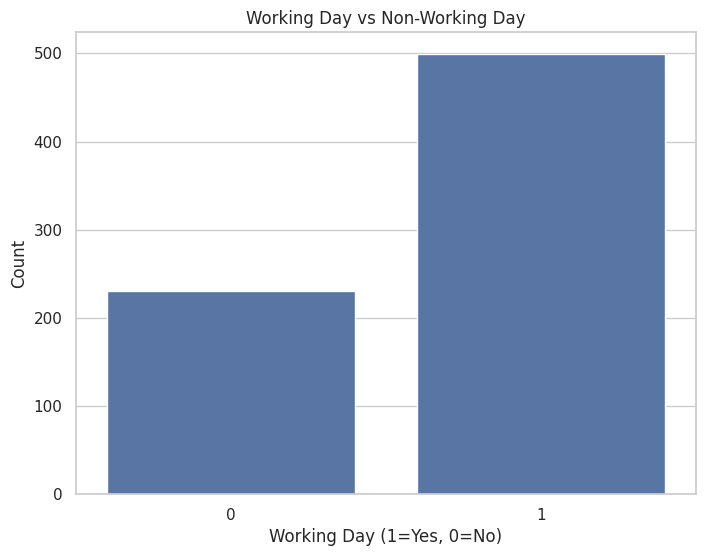

In [115]:

# Plot 3: Working Day vs Non-Working Day
plt.figure(figsize=(8, 6))
sns.countplot(x='workingday', data=data)
plt.title('Working Day vs Non-Working Day')
plt.xlabel('Working Day (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()


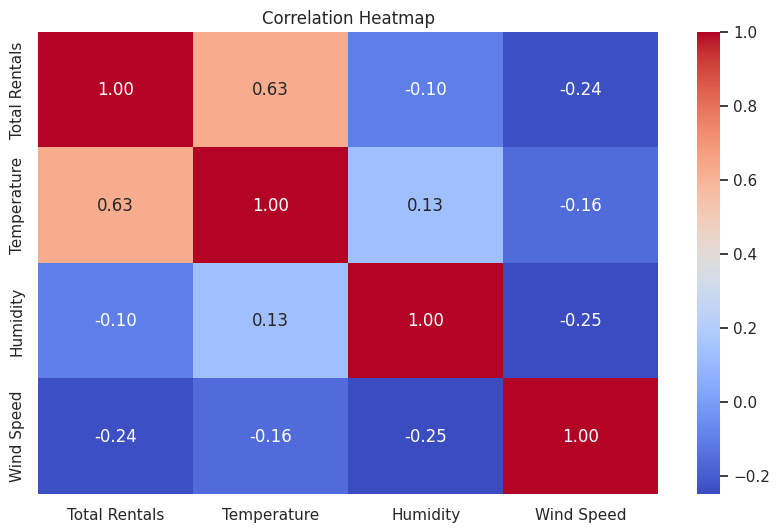

This heatmap displays the correlation matrix of numerical . 
The colors represent the strength and direction of the relationships, helping to identify highly correlated pairs.


In [116]:
# Correlation matrix for numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(data_with_dummies[['Total Rentals', 'Temperature', 'Humidity', 'Wind Speed']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Explanation
explain_plot('heatmap')




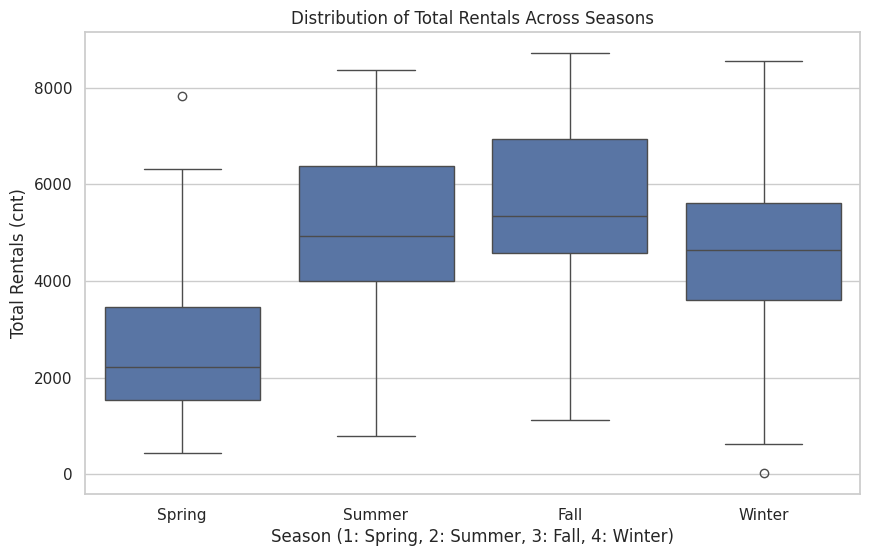

This box plot shows the total bike rentals (cnt) across the four seasons.
It highlights how rentals vary with the seasons, with some seasons experiencing higher rentals compared to others.


In [117]:
# 1. Distribution of Total Rentals (`cnt`) Across Seasons
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=data)
plt.title('Distribution of Total Rentals Across Seasons')
plt.xlabel('Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
plt.ylabel('Total Rentals (cnt)')
plt.show()

print("This box plot shows the total bike rentals (cnt) across the four seasons.\nIt highlights how rentals vary with the seasons, with some seasons experiencing higher rentals compared to others.")

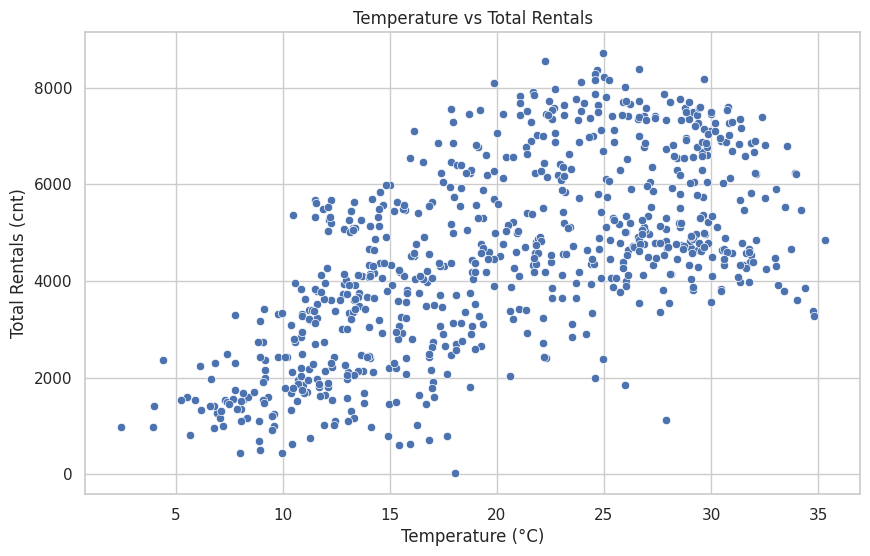

The scatter plot shows a clear positive correlation between temperature and total bike rentals, 
indicating that higher temperatures generally lead to more rentals.


In [118]:
# 2. Scatter Plot of Temperature vs Total Rentals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=data)
plt.title('Temperature vs Total Rentals')
plt.xlabel('Temperature (°C)')
plt.ylabel('Total Rentals (cnt)')
plt.show()
print("The scatter plot shows a clear positive correlation between temperature and total bike rentals, \nindicating that higher temperatures generally lead to more rentals.")

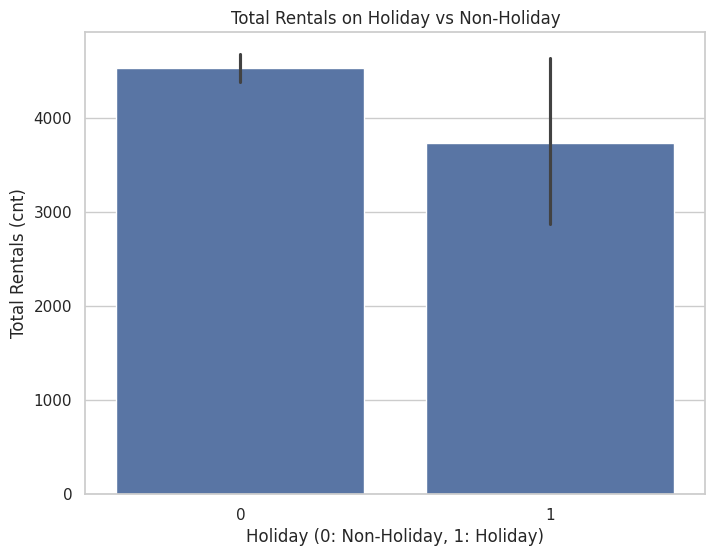

The bar plot compares bike rentals on holidays (1) and non-holidays (0). 
Non-holidays typically see more rentals, which could be linked to workday commuting.


In [119]:
# 3. Bar Plot of Total Rentals for Holiday vs Non-Holiday
plt.figure(figsize=(8, 6))
sns.barplot(x='holiday', y='cnt', data=data)
plt.title('Total Rentals on Holiday vs Non-Holiday')
plt.xlabel('Holiday (0: Non-Holiday, 1: Holiday)')
plt.ylabel('Total Rentals (cnt)')
plt.show()
print("The bar plot compares bike rentals on holidays (1) and non-holidays (0). \nNon-holidays typically see more rentals, which could be linked to workday commuting.")

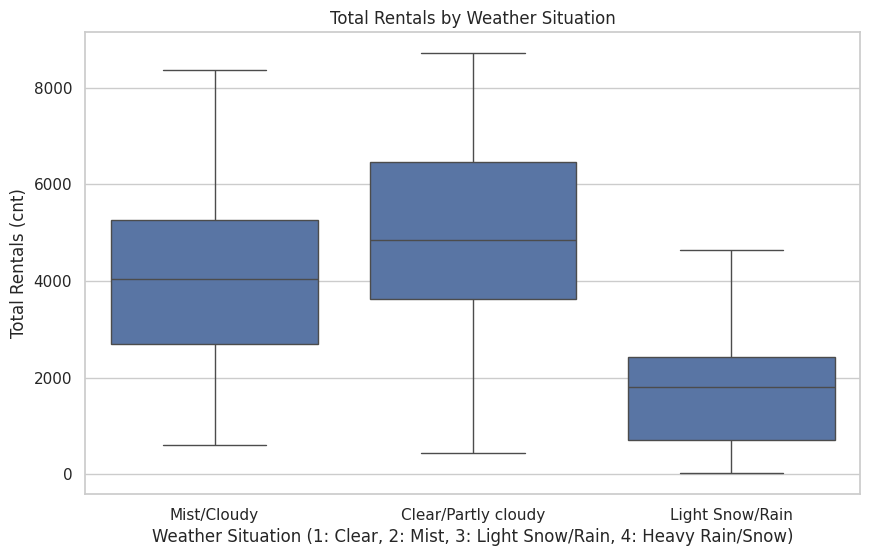

This box plot shows how weather conditions affect bike rentals. Clear weather generally sees more rentals, 
while poor weather conditions like rain or snow tend to reduce rentals.


In [120]:
# 4. Box Plot of Total Rentals by Weather Situation (`weathersit`)
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=data)
plt.title('Total Rentals by Weather Situation')
plt.xlabel('Weather Situation (1: Clear, 2: Mist, 3: Light Snow/Rain, 4: Heavy Rain/Snow)')
plt.ylabel('Total Rentals (cnt)')
plt.show()

print("This box plot shows how weather conditions affect bike rentals. Clear weather generally sees more rentals, \nwhile poor weather conditions like rain or snow tend to reduce rentals.")

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Converting 'dteday' to datetime format
data['dteday'] = pd.to_datetime(data['dteday'])

# Extracting the year from 'dteday'
data['year'] = data['dteday'].dt.year

# Dropping 'dteday' column after extracting the 'year'
data_cleaned = data.drop(columns=['instant', 'dteday', 'casual', 'registered'])

# One-hot encode categorical variables ('season' and 'weathersit')
data_encoded = pd.get_dummies(data_cleaned, columns=['season', 'weathersit'], drop_first=True)

# Splitting the data into features (X) and target (y)
X = data_encoded.drop('cnt', axis=1)
y = data_encoded['cnt']

# Splitting the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating the R-squared score
r2_test_score = r2_score(y_test, y_pred)

# Calculating the number of observations (n) and number of features (k)
n = len(y_test)  # Number of observations in the test set
k = X_train.shape[1]  # Number of independent variables

# Calculating the adjusted R-squared score
adjusted_r2_test_score = 1 - ((1 - r2_test_score) * (n - 1) / (n - k - 1))

# Formatting the results to two decimal points
r2_test_score_rounded = round(r2_test_score, 2)
adjusted_r2_test_score_rounded = round(adjusted_r2_test_score, 2)

r2_test_score_rounded, adjusted_r2_test_score_rounded

print(f"R-squared: {r2_test_score_rounded}, Adjusted R-squared: {adjusted_r2_test_score_rounded}")


R-squared: 0.85, Adjusted R-squared: 0.84
